In [13]:
#%pip install pydot graphviz 
# OR if using Anaconda/Conda environment
#%conda install pydot graphviz
#!pip install tensorflow
!pip install tf_keras


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.2 MB/s  0:00:00


In [4]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

2025-12-31 14:57:29.827488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


RecursionError: maximum recursion depth exceeded while calling a Python object

In [5]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [6]:
fashion_train.shape

(60000, 785)

In [7]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

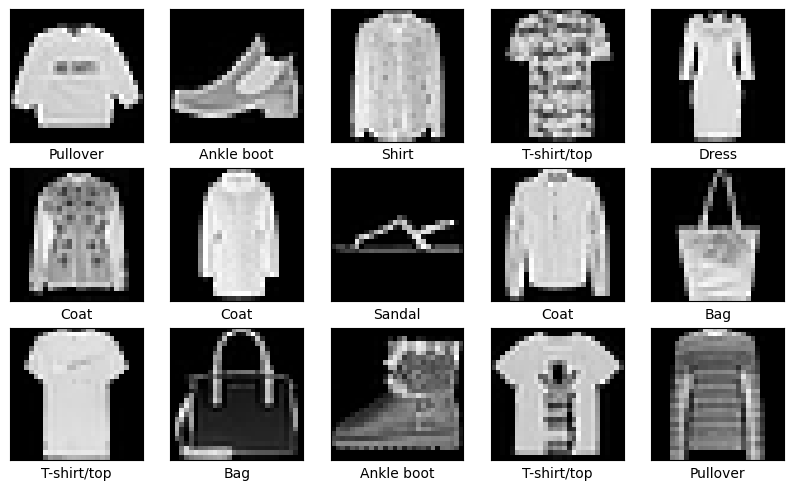

In [8]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [23]:
from tensorflow.keras.utils import to_categorical

y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [24]:
#Creating base neural network
import tf_keras as keras
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

RecursionError: maximum recursion depth exceeded

In [25]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

NameError: name 'model' is not defined

In [17]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

NameError: name 'test_acc_fashion' is not defined

In [18]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

NameError: name 'model' is not defined

In [19]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

NameError: name 'y_test_fash_eval' is not defined

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

NameError: name 'y_test_fash_eval' is not defined

In [21]:
print(history.history.keys())


NameError: name 'history' is not defined

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


NameError: name 'history' is not defined

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

NameError: name 'history' is not defined

In [27]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

NameError: name 'model' is not defined

NameError: name 'y_predict' is not defined

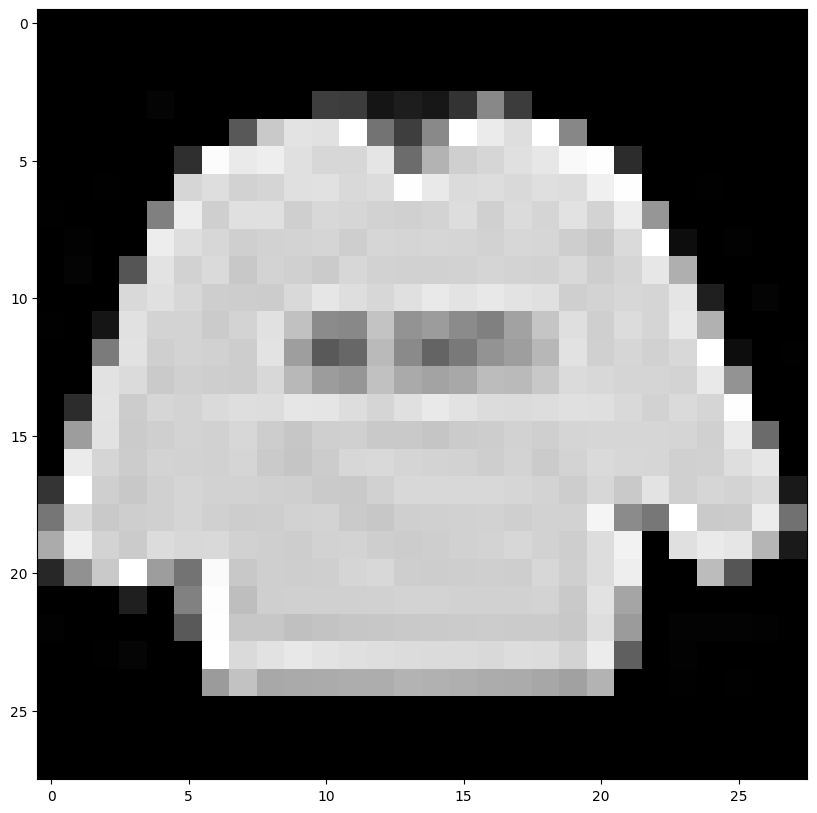

In [28]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()